<a href="https://colab.research.google.com/github/igormmendes7/Web-scrap-projects/blob/main/Cartoes_pagamento_gov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Esse projeto consiste em extrair os dados dos cartões de pagamento dispóniveis no portal da transferencia e montar uma visualização detalhada sobre cada orgão, transações e valores***

Serão extraidos os dados referente aos tipos de cartões de pagamento do governo, sendo eles:


*   Cartões de pagamento do Governo Federal ([Dicionario de dados](https://portaldatransparencia.gov.br/pagina-interna/603393-dicionario-de-dados-cpgf))
*   Cartões de pagamento Compras Centralizadas ([Dicionario de dados](https://portaldatransparencia.gov.br/pagina-interna/603392-dicionario-de-dados-cpcc))
*   Cartões de pagamento da defesa Civil ([Dicionario de dados](https://portaldatransparencia.gov.br/pagina-interna/603411-dicionario-de-dados-cpdc))






# **Bibliotecas que vamos utilizar**

In [1]:
import pandas as pd
import requests
from io import BytesIO
import zipfile
from datetime import datetime

# **Extraindo dados dos cartões de cada orgão**
Dispónivel em: https://portaldatransparencia.gov.br/download-de-dados

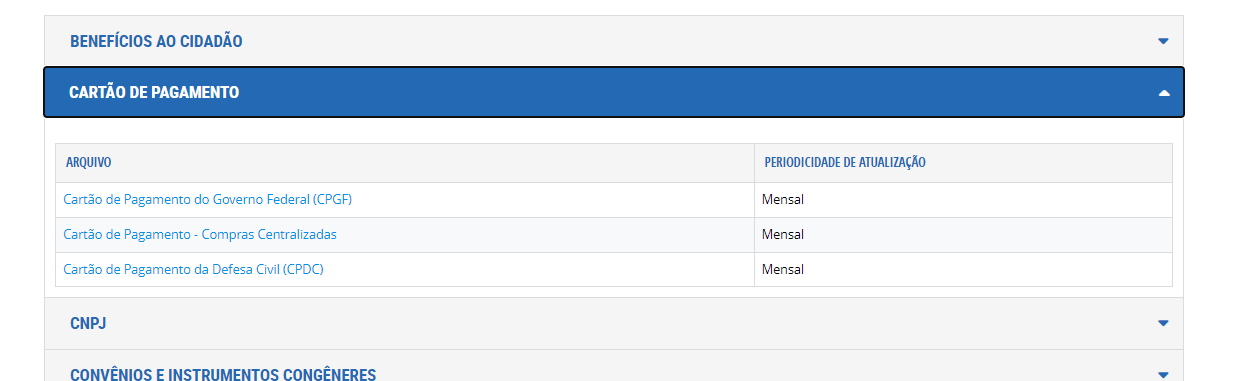

# Essa função criará um LOOP para extrair todos os arquivos de cada mês desde de 2013 (Primeiro ano dispónivel no CPGF) até 2 meses anteriores a data atual

In [2]:
def download_csv(orgao, ano, mes):
    #Como a url para cada orgão é alterada apenas pela sua respectiva sigla, podemos iterar sobre cada um deles e assim fazer o download de tudo em uma só função
    base_url = f"https://portaldatransparencia.gov.br/download-de-dados/{orgao}/"
    url = f"{base_url}{ano}{mes:02}"
    #O portal gov não aceita um request direto, temos então que imitar um navegador, fazemos isso configurando o header ou User-Agent da requisição
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Erro ao buscar dados do URL {url}: {response.status_code}")
        return None

    try:
        # Como os arquivos do site são baixados em ZIP, baixamos esse ZIP e então tentamos extrair o seu conteudo
        with zipfile.ZipFile(BytesIO(response.content)) as z:
            csv_filename = z.namelist()[0]  # Obtemos o nome do arquivo dentro do ZIP
            with z.open(csv_filename) as csv_file:
                return pd.read_csv(csv_file, encoding='ISO-8859-1', delimiter=';') #Pandas por padrão utiliza ',' como delimitador, logo, como arquivo da página vem sempre com ';', temos alterar no parametro ao abrir o CSV.
    except zipfile.BadZipFile:
        print("O arquivo baixado não é um ZIP válido.")
        return None
    except Exception as e:
        print(f"Erro desconhecido: {e}")
        return None

In [3]:
orgaos = ["CPGF", "CPDC", "CPCC"]
#Aqui vamos armazenar os dataframes em dicionarios, para cada orgão
df_por_orgao = {orgao: [] for orgao in orgaos}

#O periodo de extração é definido abaixo, sendo ano e mes atual extraidos conforme a data do sistema
ano_inicial = 2013
mes_inicial = 1
ano_atual = datetime.now().year
mes_atual = datetime.now().month

#Aqui fazemos 3 loops, sendo um pra cada orgão, outro para cada ano e outro para cada mês.
for orgao in orgaos:
    for ano in range(ano_inicial, ano_atual + 1):
        mes_final = (mes_atual - 1) if ano == ano_atual else 12
        for mes in range(mes_inicial, mes_final + 1):
            df = download_csv(orgao, ano, mes)
            if df is not None:
                #Temos aqui uma saída que nos mostra cada um dos meses extraidos, por orgão e a quantidade de linhas em cada tabela
                print(f"Órgão: {orgao}, Ano: {ano}, Mês: {mes:02}, Tamanho: {len(df)} linhas")
                df_por_orgao[orgao].append(df)

Órgão: CPGF, Ano: 2013, Mês: 01, Tamanho: 17550 linhas
Órgão: CPGF, Ano: 2013, Mês: 02, Tamanho: 3310 linhas
Órgão: CPGF, Ano: 2013, Mês: 03, Tamanho: 9473 linhas
Órgão: CPGF, Ano: 2013, Mês: 04, Tamanho: 16190 linhas
Órgão: CPGF, Ano: 2013, Mês: 05, Tamanho: 19377 linhas
Órgão: CPGF, Ano: 2013, Mês: 06, Tamanho: 15470 linhas
Órgão: CPGF, Ano: 2013, Mês: 07, Tamanho: 18587 linhas
Órgão: CPGF, Ano: 2013, Mês: 08, Tamanho: 18725 linhas
Órgão: CPGF, Ano: 2013, Mês: 09, Tamanho: 17276 linhas
Órgão: CPGF, Ano: 2013, Mês: 10, Tamanho: 18057 linhas
Órgão: CPGF, Ano: 2013, Mês: 11, Tamanho: 18633 linhas
Órgão: CPGF, Ano: 2013, Mês: 12, Tamanho: 18843 linhas
Órgão: CPGF, Ano: 2014, Mês: 01, Tamanho: 14542 linhas
Órgão: CPGF, Ano: 2014, Mês: 02, Tamanho: 2698 linhas
Órgão: CPGF, Ano: 2014, Mês: 03, Tamanho: 10214 linhas
Órgão: CPGF, Ano: 2014, Mês: 04, Tamanho: 13807 linhas
Órgão: CPGF, Ano: 2014, Mês: 05, Tamanho: 15068 linhas
Órgão: CPGF, Ano: 2014, Mês: 06, Tamanho: 16575 linhas
Órgão: CPGF, 

# Listando as colunas de cada

In [4]:
for orgao, dfs in df_por_orgao.items():
    if dfs:  # Verificar se temos algum DataFrame para este órgão
        final_df = pd.concat(dfs, ignore_index=True)
        print(f"Colunas para o órgão {orgao}:")
        print(final_df.columns.tolist())
        print('-' * 50)


Colunas para o órgão CPGF:
['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO', 'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA', 'ANO EXTRATO', 'MÊS EXTRATO', 'CPF PORTADOR', 'NOME PORTADOR', 'CNPJ OU CPF FAVORECIDO', 'NOME FAVORECIDO', 'TRANSAÇÃO', 'DATA TRANSAÇÃO', 'VALOR TRANSAÇÃO']
--------------------------------------------------
Colunas para o órgão CPDC:
['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO', 'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA', 'ANO EXTRATO', 'MÊS EXTRATO', 'CPF PORTADOR', 'NOME PORTADOR', 'CNPJ OU CPF FAVORECIDO', 'NOME FAVORECIDO', 'EXECUTOR DESPESA', 'NÚMERO CONVÊNIO', 'CÓDIGO CONVENENTE', 'NOME CONVENENTE', 'REPASSE', 'TRANSAÇÃO', 'DATA TRANSAÇÃO', 'VALOR TRANSAÇÃO']
--------------------------------------------------
Colunas para o órgão CPCC:
['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO', 'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA', 'ANO EXTRATO', 'MÊS EXTR

# **Acessando os dataframes de cada orgão**

In [5]:
dataframes_por_orgao = {}

for orgao, dfs_list in df_por_orgao.items():
    dataframes_por_orgao[orgao] = pd.concat(dfs_list, ignore_index=True)

# Exemplo de como acessar o DataFrame consolidado para um órgão específico:
df_cpgf = dataframes_por_orgao["CPGF"]
df_cpcc = dataframes_por_orgao['CPCC']
df_cpdc = dataframes_por_orgao['CPDC']


In [30]:
df_cpcc.head()

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,ANO EXTRATO,MÊS EXTRATO,TIPO AQUISIÇÃO,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO,ORGAO
0,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-09-10,329.58,Compras Centralizadas
1,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-08-29,783.02,Compras Centralizadas
2,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-08-29,119.09,Compras Centralizadas
3,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-08-29,119.09,Compras Centralizadas
4,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-09-11,112.57,Compras Centralizadas


In [8]:
print(f'Tamanho Compras Centralizadas: {df_cpcc.shape} \n'
      f'Tamanho Defesa Civil: {df_cpdc.shape} \n'
      f'Tamanho Governo Federal: {df_cpgf.shape}')


Tamanho Compras Centralizadas: (1282121, 14) 
Tamanho Defesa Civil: (117037, 20) 
Tamanho Governo Federal: (1424120, 15)


**Tratandos os dados de valores e data, para melhor envio ao BQ devido ao schema**

In [11]:
#DF_CPGF
df_cpgf['VALOR TRANSAÇÃO'] = df_cpgf['VALOR TRANSAÇÃO'].str.replace(',', '.').astype(float)
df_cpgf['DATA TRANSAÇÃO'] = pd.to_datetime(df_cpgf['DATA TRANSAÇÃO'], format='%d/%m/%Y')
#DF_CPCC
df_cpcc['VALOR TRANSAÇÃO'] = df_cpcc['VALOR TRANSAÇÃO'].str.replace(',', '.').astype(float)
df_cpcc['VALOR TRANSAÇÃO'] = df_cpcc['VALOR TRANSAÇÃO'].astype(float)
df_cpcc['DATA TRANSAÇÃO'] = pd.to_datetime(df_cpcc['DATA TRANSAÇÃO'], format='%d/%m/%Y')
#DF_CPDC
df_cpdc['VALOR TRANSAÇÃO'] = df_cpdc['VALOR TRANSAÇÃO'].str.replace(',', '.').astype(float)
df_cpdc['VALOR TRANSAÇÃO'] = df_cpdc['VALOR TRANSAÇÃO'].astype(float)
df_cpdc['DATA TRANSAÇÃO'] = pd.to_datetime(df_cpdc['DATA TRANSAÇÃO'], format='%d/%m/%Y')


In [15]:
#Descartando colunas desnecessárias
df_cpdc = df_cpdc.drop(['NÚMERO CONVÊNIO','CÓDIGO CONVENENTE'] , axis=1)

#Incluindo coluna com o nome de cada orgão
df_cpcc['ORGAO'] = 'Compras Centralizadas'
df_cpdc['ORGAO'] = 'Defesa Civil'
df_cpgf['ORGAO'] = 'Governo Federal'

#unindo todos os dataframes em um DF final
df_cartoes_pagamento = pd.concat([df_cpcc, df_cpdc, df_cpgf], axis = 0 , ignore_index=True)

**Por boas praticas vamos remover todos os acentos e espaços dos titulos de cada dataframe**

In [16]:
!pip install unidecode
#Detalhes da biblioteca aqui https://pypi.org/project/Unidecode/
import unidecode

# Função para remover acentos e substituir espaços por "_"
def tratar_nome_coluna(nome_coluna):
    nome_coluna = unidecode.unidecode(nome_coluna)  # Remove acentos
    nome_coluna = nome_coluna.replace(' ', '_')     # Substitui espaços por "_"
    return nome_coluna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.9 MB/s eta 0:00:00


Aplicando função no Dataframe

In [17]:
df_cartoes_pagamento.columns = [tratar_nome_coluna(col) for col in df_cartoes_pagamento.columns]

In [19]:
df_cartoes_pagamento.head()

,CODIGO_ORGAO_SUPERIOR,NOME_ORGAO_SUPERIOR,CODIGO_ORGAO,NOME_ORGAO,CODIGO_UNIDADE_GESTORA,NOME_UNIDADE_GESTORA,ANO_EXTRATO,MES_EXTRATO,TIPO_AQUISICAO,CNPJ_OU_CPF_FAVORECIDO,NOME_FAVORECIDO,TRANSACAO,DATA_TRANSACAO,VALOR_TRANSACAO,ORGAO,CPF_PORTADOR,NOME_PORTADOR,EXECUTOR_DESPESA,NOME_CONVENENTE,REPASSE
0,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-09-10,329.58,Compras Centralizadas,NaN,NaN,NaN,NaN,NaN
1,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-08-29,783.02,Compras Centralizadas,NaN,NaN,NaN,NaN,NaN
2,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-08-29,119.09,Compras Centralizadas,NaN,NaN,NaN,NaN,NaN
3,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-08-29,119.09,Compras Centralizadas,NaN,NaN,NaN,NaN,NaN
4,20113,Ministério do Planejamento e Orçamento,20113,Ministério do Planejamento e Orçamento - Unida...,201059,UNIDADE DE PASSAGENS AEREAS - UPA,2014,10,Sem informação,2575829000148,OCEANAIR LINHAS AEREA SA FALIDO EM RECUPERACAO...,COMPRA A/V - R$ - APRES,2014-09-11,112.57,Compras Centralizadas,NaN,NaN,NaN,NaN,NaN


# Alguns exemplos de consulta de dados

Nomes unicos dentro da coluna Orgão Superior

In [21]:
#alterar nome df para consultar outros
unique_names = df_cartoes_pagamento["NOME_ORGAO_SUPERIOR"].unique()
print("Nomes únicos na coluna 'NOME ÓRGÃO SUPERIOR':")
for name in unique_names:
    print(name)


Nomes únicos na coluna 'NOME ÓRGÃO SUPERIOR':
Ministério do Planejamento e Orçamento
Advocacia-Geral da União
Ministério da Defesa
Ministério da Educação
Presidência da República
Ministério da Agricultura e Pecuária
Ministério da Fazenda
Ministério da Justiça e Segurança Pública
Ministério da Saúde
Ministério das Comunicações
Ministério do Desenvolvimento Agrário e Agric
Ministério da Ciência, Tecnologia e Inovação
Ministério da Gestão e da Inovação em Serviço
Ministério do Desenvolvimento, Indústria, Com
Ministério do Trabalho e Emprego
Ministério do Turismo
Ministério dos Transportes
Controladoria-Geral da União
Ministério da Pesca e Aquicultura
Ministério das Mulheres
Ministério de Minas e Energia
Ministério de Portos e Aeroportos
Ministério do Meio Ambiente e Mudança do Clim
Ministério da Igualdade Racial
Ministério da Previdência Social
Ministério da Integração e do Desenvolvimento
Ministério dos Povos Indígenas
Ministério do Desenvolvimento e Assistência S
Ministério das Cidades


Filtrando pelo nome do portador

In [22]:
filtered_df = df_cartoes_pagamento[df_cartoes_pagamento['NOME_PORTADOR'].str.contains('Luiz', case=False, na=False)]

In [23]:
filtered_df.head(10)

,CODIGO_ORGAO_SUPERIOR,NOME_ORGAO_SUPERIOR,CODIGO_ORGAO,NOME_ORGAO,CODIGO_UNIDADE_GESTORA,NOME_UNIDADE_GESTORA,ANO_EXTRATO,MES_EXTRATO,TIPO_AQUISICAO,CNPJ_OU_CPF_FAVORECIDO,NOME_FAVORECIDO,TRANSACAO,DATA_TRANSACAO,VALOR_TRANSACAO,ORGAO,CPF_PORTADOR,NOME_PORTADOR,EXECUTOR_DESPESA,NOME_CONVENENTE,REPASSE
1282157,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,2491274000156,FORTILIDER COMERCIAL LTDA,COMPRA A/V - R$ - APRES,2012-11-28,111.38,Defesa Civil,***.855.646-**,LUIZ TADEU COUTINHO SOARES,ALEM PARAIBA / MG,MUNICIPIO DE ALEM PARAIBA,Não
1282697,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,2255002485,ROSSILVAN PABLO BRASILINO E ALENCAR,PAGAMENTO CONVENIO CPB,2012-12-21,5000.00,Defesa Civil,***.043.484-**,LUIZ GUSTAVO LEONARDO FERREIRA,NOVA OLINDA / PB,SECRETARIA DA INFRA-ESTRUTURA,Sim
1282698,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,2255002485,ROSSILVAN PABLO BRASILINO E ALENCAR,PAGAMENTO CONVENIO CPB,2012-12-18,5000.00,Defesa Civil,***.043.484-**,LUIZ GUSTAVO LEONARDO FERREIRA,NOVA OLINDA / PB,SECRETARIA DA INFRA-ESTRUTURA,Sim
1283137,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,32784589315,ABELARDO FRANCISCO DE CARVALHO,PAGAMENTO CONVENIO CPB,2012-12-05,8524.97,Defesa Civil,***.581.733-**,LUIZ UBIRACI DE CARVALHO,GOVERNO DO ESTADO / PI,SECRETARIA ESTADUAL DE DEFESA CIVIL,Não
1283138,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,30890693854,ADAI JOSE DE ANDRADE,PAGAMENTO CONVENIO CPB,2012-12-21,2742.98,Defesa Civil,***.581.733-**,LUIZ UBIRACI DE CARVALHO,GOVERNO DO ESTADO / PI,SECRETARIA ESTADUAL DE DEFESA CIVIL,Não
1283139,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,83122796368,ADAILDO DOS SANTOS FERREIRA,PAGAMENTO CONVENIO CPB,2012-12-21,7162.05,Defesa Civil,***.581.733-**,LUIZ UBIRACI DE CARVALHO,GOVERNO DO ESTADO / PI,SECRETARIA ESTADUAL DE DEFESA CIVIL,Não
1283140,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,4811780310,ADAUTO LOPES MOURA,PAGAMENTO CONVENIO CPB,2012-11-29,3175.57,Defesa Civil,***.581.733-**,LUIZ UBIRACI DE CARVALHO,GOVERNO DO ESTADO / PI,SECRETARIA ESTADUAL DE DEFESA CIVIL,Não
1283141,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,4084086509,ADELINO EVANGELISTA DE ALMEIDA NETO,PAGAMENTO CONVENIO CPB,2012-12-13,9432.15,Defesa Civil,***.581.733-**,LUIZ UBIRACI DE CARVALHO,GOVERNO DO ESTADO / PI,SECRETARIA ESTADUAL DE DEFESA CIVIL,Não
1283142,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,27438988368,ADERSON JUNIOR MARQUES BUENOS AIRES,PAGAMENTO CONVENIO CPB,2012-12-21,8690.67,Defesa Civil,***.581.733-**,LUIZ UBIRACI DE CARVALHO,GOVERNO DO ESTADO / PI,SECRETARIA ESTADUAL DE DEFESA CIVIL,Não
1283143,53000,Ministério da Integração e do Desenvolvimento,53000,Ministério da Integração e do Desenvolvimento ...,530012,SECRETARIA NACIONAL PROTECAO E DEFESA CIVIL,2013,1,NaN,30396521843,ADRIANO DE SOUSA COSTA,PAGAMENTO CONVENIO CPB,2012-11-29,9432.08,Defesa Civil,***.581.733-**,LUIZ UBIRACI DE CARVALHO,GOVERNO DO EST

# **Agora, enviaremos a tabela para uma conta Big Query de estudante**

Para criar uma conta no BQ acesse: https://cloud.google.com/edu/students?hl=pt-br

A conexão será direta pelo BQ, necessitando apenas de autenticação atraves da auth.authenticate_user(). Há também a opção de realizar uma integração via API, caso opte por essa opção confira a documentação do BQ

In [24]:
!pip install google-cloud-bigquery pandas-gbq



**Dando acesso do colab para o BQ**

In [25]:
from google.colab import auth
auth.authenticate_user()


In [28]:
#Inclua o ID do seu projeto aqui
project_id = 'SEU ID DE PROJETO'

**Importando tabelas para o BQ**

In [29]:
df_cartoes_pagamento.to_gbq(destination_table='Datasets.cartoes_pagamento', project_id=project_id, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7332.70it/s]


## **Pronto, nossos 3 dataframes foram enviados ao BQ, a partir de agora podemos fazer diversas manipulações atraves do SQL ou se preferir, dentro da propria ferramenta de Data Viz que vier a utilizar**